# Encoding - Part A

In [111]:
import numpy as np

: 

In [112]:
def outerProduct(s, t):
  return np.outer(s, t)

In [113]:
def train_BAM(s, t):
  W = np.zeros((s.shape[1], t.shape[1]), dtype='int32')
  for i in range(s.shape[0]):
    outer_product = np.outer(matrixTranspose(s[i]), t[i])
    W += outer_product
  return W

In [114]:
def calcWeight(s, t):
  return np.dot(s.T, t)

In [115]:
def matrixTranspose(x):
  return np.matrix.transpose(x)

In [116]:
def activationFunction1(y):
  if y >= 0:
    return 1
  else:
    return -1

In [117]:
def activationFunction2(x):
  if x <= 0:
    return -1
  else:
    return 1

In [118]:
def threshold(y):
  if y > 0:
    return 1
  elif y == 0:
    return y
  else:
    return -1

In [119]:
def thresholdActivate(x):
  return np.vectorize(threshold)(x)

In [120]:
def forward_activate(x):
  return np.vectorize(activationFunction1)(x)

In [121]:
def backward_activate(x):
  return np.vectorize(activationFunction2)(x)

In [122]:
# Used provided threshold function from slides
def recall1(x, w, d = 'out'):
  equilibrium = False
  y_output = None
  activateX = y_output

  while equilibrium == False:
    y_output = forward_activate(w.T.dot(x)) if d == 'out' else thresholdActivate(w.dot(x))

    activateX = backward_activate(w.dot(y_output)) if d == 'out' else thresholdActivate(w.T.dot(y_output))

    x,equilibrium = activateX,np.all(np.equal(x, activateX))

  return y_output

In [123]:
# Original Vector sets
s = np.array([[-1, 1, 1, 1, -1], [-1, -1, -1, -1, 1], [-1, -1, -1, 1, 1]])
t = np.array([[1, 1, -1, 1], [1, -1, -1, -1], [-1, -1, 1, 1]])
# uses recall1 function to train and predict outputs
def BAM_Net1(s, t):
  W = train_BAM(s, t)

  print(" X --> Y")
  for x,y in zip(s,t):
    y_pred = recall1(x, W, 'out')
    print("x =", x, "target =", y, "y =", y_pred," :", np.array_equal(y, y_pred))

  print(" Y --> X")

  for x,y in zip(s,t):
    x_pred = recall1(y, W, 'in')
    print("y =", y, "target =", x, "y =", x_pred," :", np.array_equal(x, x_pred))
  return W


In [124]:
BAM_Net1(s,t)

 X --> Y
x = [-1  1  1  1 -1] target = [ 1  1 -1  1] y = [ 1  1 -1  1]  : True
x = [-1 -1 -1 -1  1] target = [ 1 -1 -1 -1] y = [-1 -1  1 -1]  : False
x = [-1 -1 -1  1  1] target = [-1 -1  1  1] y = [-1 -1  1  1]  : True
 Y --> X
y = [ 1  1 -1  1] target = [-1  1  1  1 -1] y = [-1  1  1  1 -1]  : True
y = [ 1 -1 -1 -1] target = [-1 -1 -1 -1  1] y = [ 1 -1 -1 -1  1]  : False
y = [-1 -1  1  1] target = [-1 -1 -1  1  1] y = [ 1 -1 -1 -1  1]  : False


array([[-1,  1,  1, -1],
       [ 1,  3, -1,  1],
       [ 1,  3, -1,  1],
       [-1,  1,  1,  3],
       [-1, -3,  1, -1]], dtype=int32)

In [125]:
# improved threshold used here.
def recall(x, w, d = 'out'):
  equilibrium = False
  y_output = None
  activateX = y_output

  # Equalibrium reaches when x and activateX vectors are equal
  while equilibrium == False:
    #  if function receives out then executes forward activate function else backward. X as input -> Y as output
    y_output = forward_activate(w.T.dot(x)) if d == 'out' else backward_activate(w.dot(x))

    # if function receives out then executes backward activate else forward, Y as input -> X as output
    activateX = backward_activate(w.dot(y_output)) if d == 'out' else forward_activate(w.T.dot(y_output))

    x,equilibrium = activateX,np.all(np.equal(x, activateX))

  return y_output

In [126]:
s = np.array([[-1, 1, 1, 1, -1], [-1, -1, -1, -1, 1], [-1, -1, -1, 1, 1]])
t = np.array([[1, 1, -1, 1], [1, -1, -1, -1], [-1, -1, 1, 1]])

def BAM_Net(s, t):
  W = train_BAM(s, t) # trains a BAM network and calculates the weight the matrix

  # Prints the Y predicted outputs, if X is the input then Y is the output.
  print(" X --> Y")
  for x,y in zip(s,t):
    y_pred = recall(x, W, 'out')
    print("x =", x, "target =", y, "y =", y_pred," :", np.array_equal(y, y_pred))

  # Prints X as predicted outputs, if Y is the input from target vectors then X is the predicted output from source vector set s.
  print(" Y --> X")
  for x,y in zip(s,t):
    x_pred = recall(y, W, 'in')
    print("y =", y, "target =", x, "y =", x_pred," :", np.array_equal(x, x_pred))
  return W


In [127]:
BAM_Net(s,t) # BAM net with improved threshold

 X --> Y
x = [-1  1  1  1 -1] target = [ 1  1 -1  1] y = [ 1  1 -1  1]  : True
x = [-1 -1 -1 -1  1] target = [ 1 -1 -1 -1] y = [-1 -1  1 -1]  : False
x = [-1 -1 -1  1  1] target = [-1 -1  1  1] y = [-1 -1  1  1]  : True
 Y --> X
y = [ 1  1 -1  1] target = [-1  1  1  1 -1] y = [-1  1  1  1 -1]  : True
y = [ 1 -1 -1 -1] target = [-1 -1 -1 -1  1] y = [ 1 -1 -1 -1  1]  : False
y = [-1 -1  1  1] target = [-1 -1 -1  1  1] y = [-1 -1 -1  1  1]  : True


array([[-1,  1,  1, -1],
       [ 1,  3, -1,  1],
       [ 1,  3, -1,  1],
       [-1,  1,  1,  3],
       [-1, -3,  1, -1]], dtype=int32)

# Cross Talk - Part B

(i,k) = (0, 1)
CrossTalk S1: [-1 -1 -1 -1  1] and S0: [-1  1  1  1 -1] = [-0.6  0.6  0.6  0.6]
(i,k) = (0, 2)
CrossTalk S2: [-1 -1 -1  1  1] and S0: [-1  1  1  1 -1] = [-0.4  0.8  0.4  0.4]
CrossTalk of C[0] = [-0.4  0.8  0.4  0.4]
||C0||: 1.0583005244258359

(i,k) = (1, 0)
CrossTalk S0: [-1  1  1  1 -1] and S1: [-1 -1 -1 -1  1] = [-0.6 -0.6  0.6 -0.6]
(i,k) = (1, 2)
CrossTalk S2: [-1 -1 -1  1  1] and S1: [-1 -1 -1 -1  1] = [-1.2 -1.2  1.2  0. ]
CrossTalk of C[1] = [-1.2 -1.2  1.2  0. ]
||C1||: 2.078460969082652

(i,k) = (2, 0)
CrossTalk S0: [-1  1  1  1 -1] and S2: [-1 -1 -1  1  1] = [-0.2 -0.2  0.2 -0.2]
(i,k) = (2, 1)
CrossTalk S1: [-1 -1 -1 -1  1] and S2: [-1 -1 -1  1  1] = [ 0.4 -0.8 -0.4 -0.8]
CrossTalk of C[2] = [ 0.4 -0.8 -0.4 -0.8]
||C2||: 1.2649110640673513



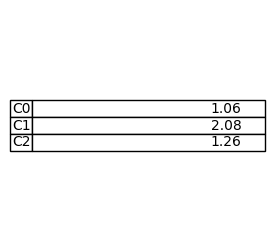

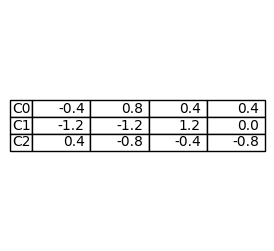

Cross-Talk values for each vector in A: 
 [[-0.4  0.8  0.4  0.4]
 [-1.2 -1.2  1.2  0. ]
 [ 0.4 -0.8 -0.4 -0.8]]


In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CrossTalkMagnitude = []

# Define matrices s and t
s = np.array([[-1, 1, 1, 1, -1], [-1, -1, -1, -1, 1], [-1, -1, -1, 1, 1]])
t = np.array([[1, 1, -1, 1], [1, -1, -1, -1], [-1, -1, 1, 1]])

# Function to compute cosine similarity
def cosine_similarity(a, b):
    dot = np.dot(np.matrix.transpose(a), b)
    norma = np.linalg.norm(a)
    normb = np.linalg.norm(b)
    return dot / (norma * normb)

# Function to compute cross-talk
def computeCrossTalk(s, t):
    crossTalk = np.zeros((s.shape[0], t.shape[1]))

    # i = 0 k = 1
    for i in range(s.shape[0]):
        for k in range(s.shape[0]):
            if i != k:
              print(f"(i,k) = {i, k}")
              cosValue = cosine_similarity(s[k], s[i])
              # Multipling the vector t[k] by the scalar cosValue
              crossTalk[i] += t[k].dot(cosValue)
              print(f"CrossTalk S{k}: {s[k]} and S{i}: {s[i]} = {crossTalk[i]}")
        print(f"CrossTalk of C[{i}] = {crossTalk[i]}")
        print(f"||C{i}||: {np.linalg.norm(crossTalk[i])}")

        print()
    return crossTalk

# Computing cross-talk and print the result
crossTalkResult = computeCrossTalk(s, t)

crossTalkResult = np.round(crossTalkResult, 2)

for i in range(len(crossTalkResult)):
    CrossTalkMagnitude.append(np.linalg.norm(crossTalkResult[i]))

# Magnitude graphical Table
CrossTalkMagnitude = np.round(CrossTalkMagnitude, 2)

row_labels1 = ['C0', 'C1', 'C2']
df = pd.DataFrame(CrossTalkMagnitude, index=row_labels1)

fig2, ax2 = plt.subplots(figsize=(3, 3))
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=df.values, rowLabels=df.index, loc='center')


# Cross Talk vector graphical table
row_labels = ['C0', 'C1', 'C2']
df = pd.DataFrame(crossTalkResult, index=row_labels)

# Creating a graphical table
fig, ax = plt.subplots(figsize=(3, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, rowLabels=df.index, loc='center')

# Showing the plot
plt.show()

print("Cross-Talk values for each vector in A: \n", crossTalkResult)


# Part C


Predicting Outputs BAM Net: 

 X --> Y
x = [-1  1  1  1 -1] target = [ 1  1 -1  1] y = [ 1  1 -1  1]  : True
x = [-1 -1 -1 -1  1] target = [ 1 -1 -1 -1] y = [ 1 -1 -1  1]  : False
x = [-1 -1 -1  1  1] target = [-1 -1  1  1] y = [-1 -1  1  1]  : True
x = [1 1 1 1 1] target = [-1  1  1 -1] y = [-1  1  1 -1]  : True
 Y --> X
y = [ 1  1 -1  1] target = [-1  1  1  1 -1] y = [-1  1  1  0 -1]  : False
y = [ 1 -1 -1 -1] target = [-1 -1 -1 -1  1] y = [-1 -1 -1 -1 -1]  : False
y = [-1 -1  1  1] target = [-1 -1 -1  1  1] y = [ 1 -1 -1  0  1]  : False
y = [-1  1  1 -1] target = [1 1 1 1 1] y = [1 1 1 1 1]  : True

Computing Cross-Talks: 

(i,k) = (0, 1)
CrossTalk S1: [-1 -1 -1 -1  1] and S0: [-1  1  1  1 -1] = [-0.6  0.6  0.6  0.6]
(i,k) = (0, 2)
CrossTalk S2: [-1 -1 -1  1  1] and S0: [-1  1  1  1 -1] = [-0.4  0.8  0.4  0.4]
(i,k) = (0, 3)
CrossTalk S3: [1 1 1 1 1] and S0: [-1  1  1  1 -1] = [-0.6  1.   0.6  0.2]
CrossTalk of C[0] = [-0.6  1.   0.6  0.2]
||C0||: 1.3266499161421597

(i,k) = (1, 0)

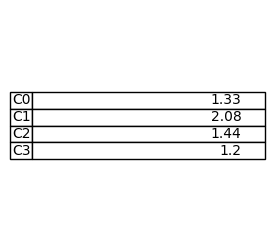

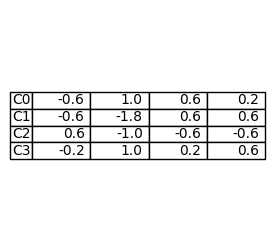

Cross-Talk values for each vector in A: 
 [[-0.6  1.   0.6  0.2]
 [-0.6 -1.8  0.6  0.6]
 [ 0.6 -1.  -0.6 -0.6]
 [-0.2  1.   0.2  0.6]]


In [129]:
s = np.array([[-1, 1, 1, 1, -1], [-1, -1, -1, -1, 1], [-1, -1, -1, 1, 1], [1, 1, 1, 1, 1]])
t = np.array([[1, 1, -1, 1], [1, -1, -1, -1], [-1, -1, 1, 1], [-1, 1, 1, -1]])

CrossTalkMagnitude = []

# Predicting Output
print("\nPredicting Outputs BAM Net: \n")
BAM_Net1(s,t)

print("\nComputing Cross-Talks: \n")
# Computing cross-talk and print the result
crossTalkResult = computeCrossTalk(s, t)

for i in range(len(crossTalkResult)):
    CrossTalkMagnitude.append(np.linalg.norm(crossTalkResult[i]))


# Magnitude graphical Table
CrossTalkMagnitude = np.round(CrossTalkMagnitude, 2)

row_labels1 = ['C0', 'C1', 'C2', 'C3']
df = pd.DataFrame(CrossTalkMagnitude, index=row_labels1)

fig2, ax2 = plt.subplots(figsize=(3, 3))
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=df.values, rowLabels=df.index, loc='center')


crossTalkResult = np.round(crossTalkResult, 2)

row_labels = ['C0', 'C1', 'C2', 'C3']
df = pd.DataFrame(crossTalkResult, index=row_labels)

# Creating a graphical table
fig, ax = plt.subplots(figsize=(3, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, rowLabels=df.index, loc='center')

# Showing the plot
plt.show()

print("Cross-Talk values for each vector in A: \n", crossTalkResult)



Predicting Outputs BAM Net: 

 X --> Y
x = [-1  1  1  1 -1] target = [ 1  1 -1  1] y = [-1  1  1  1]  : False
x = [-1 -1 -1 -1  1] target = [ 1 -1 -1 -1] y = [ 1 -1 -1 -1]  : True
x = [-1 -1 -1  1  1] target = [-1 -1  1  1] y = [-1 -1 -1  1]  : False
x = [1 1 1 1 1] target = [-1  1  1 -1] y = [-1  1  1  1]  : False
x = [-1 -1  1 -1 -1] target = [ 1 -1  1 -1] y = [ 1 -1 -1 -1]  : False
x = [-1  1 -1  1 -1] target = [-1 -1 -1 -1] y = [-1 -1 -1  1]  : False
x = [ 1 -1 -1 -1  1] target = [ 1  1 -1 -1] y = [ 1 -1 -1 -1]  : False
 Y --> X
y = [ 1  1 -1  1] target = [-1  1  1  1 -1] y = [ 1 -1  1 -1  1]  : False
y = [ 1 -1 -1 -1] target = [-1 -1 -1 -1  1] y = [-1 -1 -1 -1 -1]  : False
y = [-1 -1  1  1] target = [-1 -1 -1  1  1] y = [-1  1 -1  1 -1]  : False
y = [-1  1  1 -1] target = [1 1 1 1 1] y = [1 1 1 1 1]  : True
y = [ 1 -1  1 -1] target = [-1 -1  1 -1 -1] y = [-1 -1 -1 -1 -1]  : False
y = [-1 -1 -1 -1] target = [-1  1 -1  1 -1] y = [-1 -1 -1 -1 -1]  : False
y = [ 1  1 -1 -1] target = 

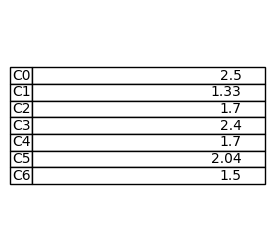

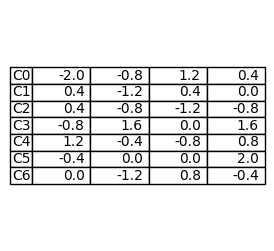

Cross-Talk values for each vector in A: 
 [[-2.  -0.8  1.2  0.4]
 [ 0.4 -1.2  0.4  0. ]
 [ 0.4 -0.8 -1.2 -0.8]
 [-0.8  1.6  0.   1.6]
 [ 1.2 -0.4 -0.8  0.8]
 [-0.4  0.   0.   2. ]
 [ 0.  -1.2  0.8 -0.4]]


In [130]:
s = np.array([[-1, 1, 1, 1, -1], [-1, -1, -1, -1, 1], [-1, -1, -1, 1, 1], [1, 1, 1, 1, 1], [-1,-1,1,-1,-1], [-1, 1, -1, 1, -1], [1, -1, -1, -1, 1]])
t = np.array([[1, 1, -1, 1], [1, -1, -1, -1], [-1, -1, 1, 1], [-1, 1, 1, -1], [1, -1, 1, -1], [-1, -1, -1, -1], [1, 1, -1, -1]])

CrossTalkMagnitude = []

# Predicting Output
print("\nPredicting Outputs BAM Net: \n")
BAM_Net1(s,t)

print("\nComputing Cross-Talks: \n")
# Compute cross-talk and print the result
crossTalkResult = computeCrossTalk(s, t)

crossTalkResult = np.round(crossTalkResult, 2)

for i in range(len(crossTalkResult)):
    CrossTalkMagnitude.append(np.linalg.norm(crossTalkResult[i]))

# Magnitude graphical Table
CrossTalkMagnitude = np.round(CrossTalkMagnitude, 2)

row_labels1 = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
df = pd.DataFrame(CrossTalkMagnitude, index=row_labels1)

fig2, ax2 = plt.subplots(figsize=(3, 3))
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=df.values, rowLabels=df.index, loc='center')

# Cross talk graphical table
row_labels = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
df = pd.DataFrame(crossTalkResult, index=row_labels)

# Create a graphical table
fig, ax = plt.subplots(figsize=(3, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, rowLabels=df.index, loc='center')

# Show the plot
plt.show()

print("Cross-Talk values for each vector in A: \n", crossTalkResult)


# Part D

In [131]:
import numpy as np

def hamming_distance(a, b):
    # checks for same length arrays
    if len(a) != len(b):
        raise ValueError("Arrays must be same length")

    # Computing hamming distance by finding positions that differs
    return np.sum(np.array(a) != np.array(b))

 X --> Y
x = [-1  1  1  1 -1] target = [ 1  1 -1  1] y = [ 1  1 -1  1]  : True
x = [-1 -1 -1 -1  1] target = [ 1 -1 -1 -1] y = [-1 -1  1 -1]  : False
x = [-1 -1 -1  1  1] target = [-1 -1  1  1] y = [-1 -1  1  1]  : True
 Y --> X
y = [ 1  1 -1  1] target = [-1  1  1  1 -1] y = [-1  1  1  1 -1]  : True
y = [ 1 -1 -1 -1] target = [-1 -1 -1 -1  1] y = [ 1 -1 -1 -1  1]  : False
y = [-1 -1  1  1] target = [-1 -1 -1  1  1] y = [ 1 -1 -1 -1  1]  : False


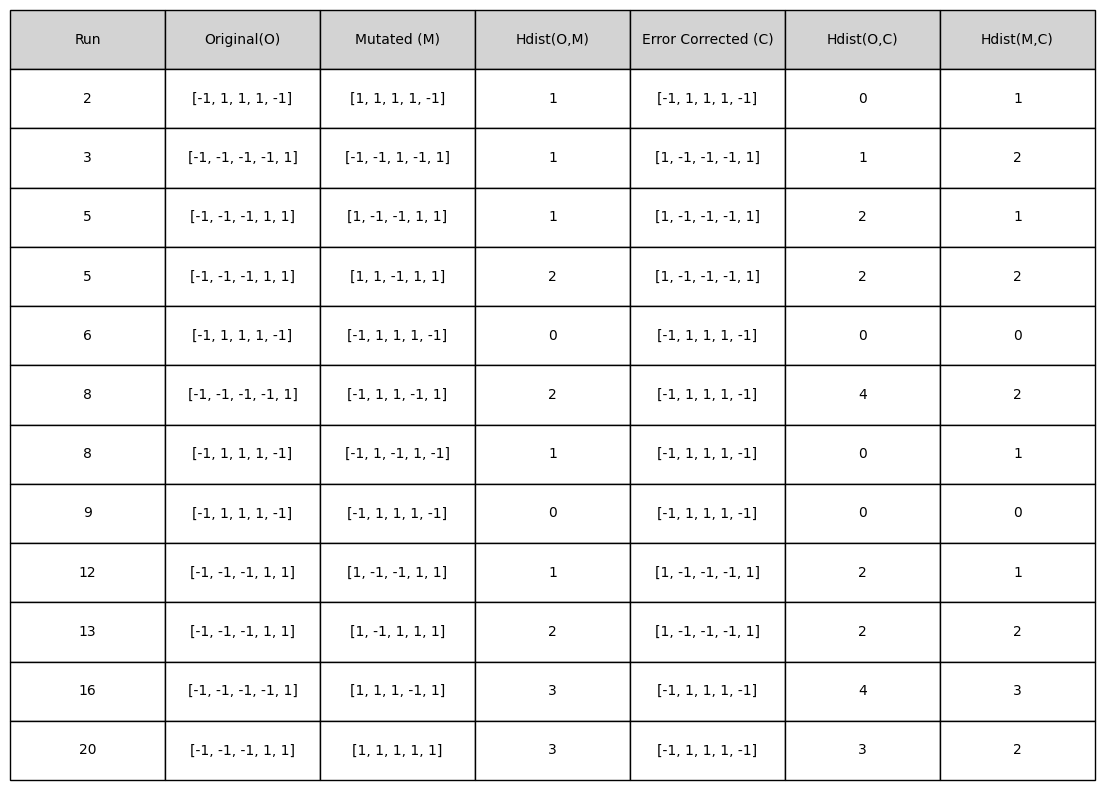

In [132]:
# If the program keeps on running, try clicking run again. It runs instantly.
import matplotlib.pyplot as plt
from matplotlib.table import Table

s = np.array([[-1, 1, 1, 1, -1], [-1, -1, -1, -1, 1], [-1, -1, -1, 1, 1]])

t = np.array([[1, 1, -1, 1], [1, -1, -1, -1], [-1, -1, 1, 1]])

W = BAM_Net1(s,t)

mutated_s = s.copy() # deep copy

error = False

table_data = []

# Recording 20 runs
for i in range(20):
  for j in range(s.shape[0]):
    # mutation probability
    if(np.random.random() < 0.2):
      rand = np.random.randint(0, 3)

      original_s = s[rand] # Stores random vector from set s
      mutated_s[rand][j] *= -1 # flips bit
      hamming_distance_before = hamming_distance(original_s, mutated_s[rand]) # finding hamming distance

      # Error correcting mechanism
      #while error == False:
      for k in range(6):
        Error_Y = recall1(mutated_s[rand], W, 'out')
        Error_X = recall1(Error_Y, W, 'in')

        if np.array_equal(original_s, Error_X):
          break
        #error = np.array_equal(original_s, Error_X) # logic to get out of loop, checks if error corrected X is similar to original then it exits

      hamming_distance_after = hamming_distance(original_s, Error_X) # Hamming distance of O and C
      hamming_distance_ErrorAndMutated = hamming_distance(mutated_s[rand], Error_X) # hamming distance of M & C
      table_data.append([i+1, original_s.tolist(), mutated_s[rand].tolist(),
                               hamming_distance_before, Error_X.tolist(), hamming_distance_after, hamming_distance_ErrorAndMutated]) # for graph plot

# Plotting the table
fig, ax = plt.subplots(figsize=(14, 10))
ax.set_axis_off()

# Creating table
tbl = Table(ax, bbox=[0, 0, 1, 1])

# Column headers
columns = ['Run', 'Original(O)', 'Mutated (M)', 'Hdist(O,M)', 'Error Corrected (C)', 'Hdist(O,C)', 'Hdist(M,C)']

# Adding header
for i, column in enumerate(columns):
    tbl.add_cell(0, i, width=1, height=0.5, text=column, loc='center', facecolor='lightgrey')

# Adding data rows
for row_idx, row_data in enumerate(table_data):
    for col_idx, val in enumerate(row_data):
        tbl.add_cell(row_idx+1, col_idx, width=1, height=0.5, text=str(val), loc='center')

# Adjusting the plot
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
ax.add_table(tbl)

plt.show()